# **House Price Prediction**

# Importing Libraries

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
%matplotlib inline

# Loading Boston Dataset

In [146]:
house_data = load_boston()
# print(house_data)
house_data.keys()

/Users/thanseef/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

# Loading the dataset to a pandas dataframe

In [147]:
house_price_data = pd.DataFrame(house_data.data,columns=house_data.feature_names)
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [148]:
# add a target data into the house dataset
house_price_data['price'] = house_data.target
house_price_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [149]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [150]:
house_price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 1 - Positive Correlation \
 2 - Negative Correlation

In [151]:
correlation = house_price_data.corr()

<AxesSubplot: >

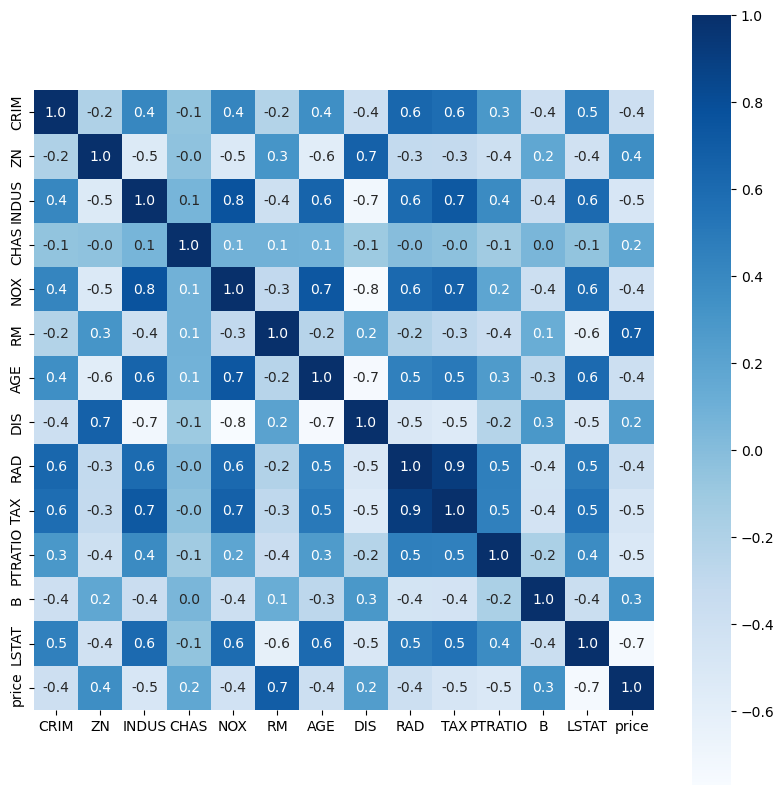

In [152]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={"size":10},cmap="Blues")

In [153]:
# taking all plots to get to know the dataset
# Exploratory Data analysis
# sns.pairplot(data=house_price_data)

Text(0, 0.5, 'Price')

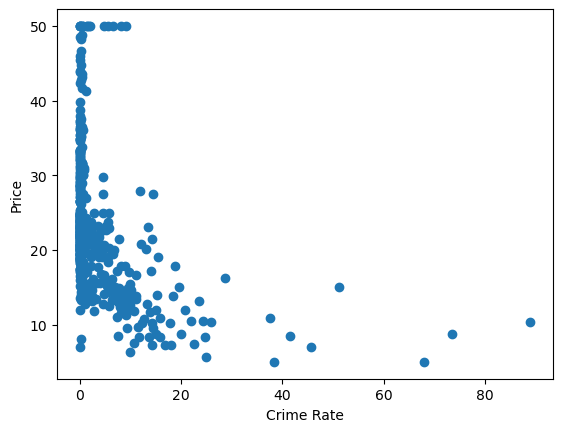

In [154]:
plt.scatter(house_price_data['CRIM'],house_price_data['price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<AxesSubplot: xlabel='RM', ylabel='price'>

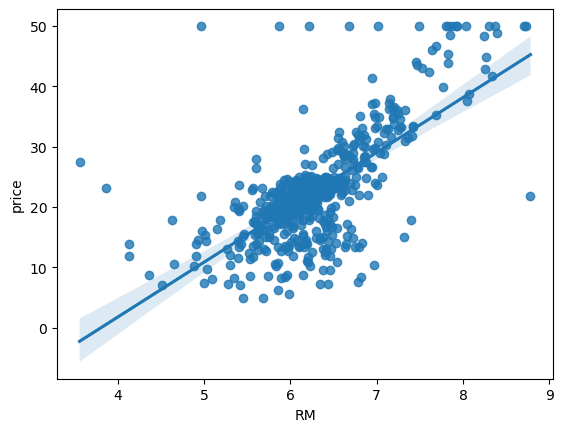

In [155]:
sns.regplot(x="RM",y="price",data=house_price_data)
#number of room increase the price also get increase.

# Splitting Data and Target

In [156]:
X = house_price_data.drop(['price'],axis=1)
Y = house_price_data['price']

In [157]:
print(X.shape,Y.shape)

(506, 13) (506,)


# Splitting the data's into Traininig set and Test set

In [158]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [159]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


## Standardization / Feature Scaling

In [160]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Model Training

In [161]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [162]:
regression.fit(X_train,Y_train)

LinearRegression()

In [163]:
#print the coefficients and the intercept
regression.coef_

array([-0.93451207,  0.85487686, -0.10446819,  0.81541757, -1.90731862,
        2.54650028,  0.25941464, -2.92654009,  2.80505451, -1.95699832,
       -2.15881929,  1.09153332, -3.91941941])

In [164]:
regression.intercept_

22.44133663366336

In [165]:
# on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [166]:
# predicting with the test data
reg_pred = regression.predict(X_test)

In [167]:
reg_pred

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

## Assumption

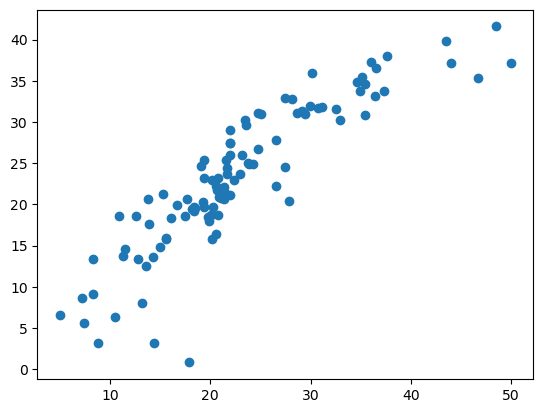

In [168]:
# plot a scatter plot for prediction
plt.scatter(Y_test,reg_pred)

In [169]:
# Residuals
residuals = Y_test - reg_pred

In [170]:
residuals

463   -2.815062
152   -5.911587
291    3.584096
183    0.934576
384    5.617373
         ...   
200    2.613353
12     0.617901
129    0.645323
194   -2.286966
320   -1.191749
Name: price, Length: 102, dtype: float64

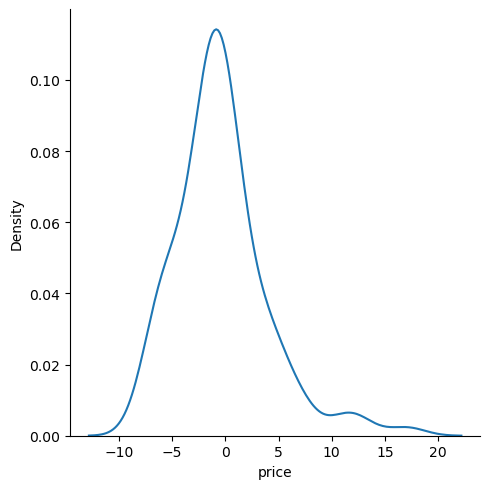

In [171]:
# plot this residuals
sns.displot(residuals,kind="kde")

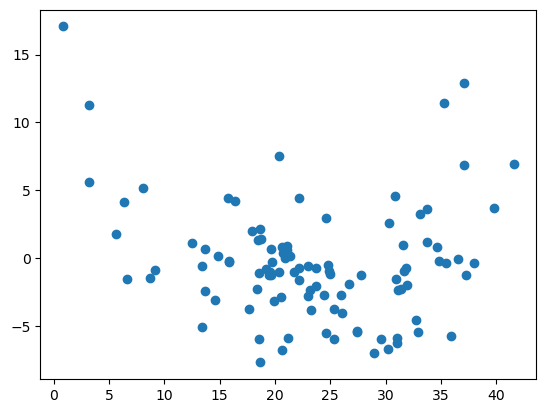

In [172]:
## scatter plot with respect to prediction and residuals
# Uniform distribution
plt.scatter(reg_pred,residuals)

In [173]:
# plt.scatter(Y_test,reg_pred)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Price Vs Predicted Price")
# plt.show()

In [174]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

18.49542012244839
3.113043746893425
4.300630200615765


## R square and adjusted R square

formula
### R^2 = 1 - SSR/SST
R^2 = coefficient of determination, SSR = sum of squares of residuals , SST = total sum of squares

In [175]:
score = r2_score(Y_test,reg_pred)
print(score)

0.7789207451814418


## Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

where

R2: The R2 of the model n: The number of observation 

In [176]:
# display adjusted R-square
1 - (1 - score) * (len(Y_test) - 1)/(len(Y_test) - X_test.shape[1] - 1)

0.7462613098105184

## Predictive System

In [190]:
print(house_data.data[0]) # sample data giving

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


In [178]:
sample_data = house_data.data[0].reshape(1,-1) #reshaping into 2d array
standardized_data = scalar.transform(sample_data)
predicted_result = regression.predict(standardized_data)
print(predicted_result)

[30.62169482]


/Users/thanseef/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## pickling the model file for Deployment

In [179]:
import pickle
pickle.dump(regression,open('house_price_predict_ml_model.pkl','wb'))# exporting the trained model to a ml model file using pickle,("write byte")

In [180]:
pickle.dump(scalar,open("standardization.pkl",'wb'))

## Loading the stored Pickle ML Model

In [191]:
loaded_pickle = pickle.load(open('house_price_predict_ml_model.pkl','rb'))
print(loaded_pickle.predict(standardized_data))

[30.62169482]


# Loading Model

**XGBooster Regressor**

In [182]:
# model = XGBRegressor()
# model.fit(X_train,Y_train)

# Evaluating The Training set

In [183]:
# train_data_prediction = model.predict(X_train)

In [184]:
# R Squared Error
# score_1 = r2_score(Y_train,train_data_prediction)

# # Mean Absolute Error
# score_2 = mean_absolute_error(Y_train,train_data_prediction)

In [185]:
# print(f"R Squared Error :{score_1}")
# print(f"Mean Absolute Error :{score_2}")

# Visualizing the Training data

In [186]:
# plt.scatter(Y_train,train_data_prediction)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual Price Vs Predicted Price")
# plt.show()

# Evaluating the Test Set

In [187]:
# test_data_prediction = model.predict(X_test)

In [188]:
# # R Squared Error
# score_1 = r2_score(Y_test,test_data_prediction)

# # Mean Absolute Error
# score_2 = mean_absolute_error(Y_test,test_data_prediction)

In [189]:
# print(f"R Squared Error :{score_1}")
# print(f"Mean Absolute Error :{score_2}")